# UFC: Statistik, Stjärnor och Dominans i Oktagonen

Mixed Martial Arts (MMA) är en sport som kräver en otrolig kombination av styrka, teknik och strategi. UFC är epicentrum för denna actionfyllda värld. Men vilka är de riktiga dominanterna i oktagonen? 

## Inledning
Ultimate Fighting Championship (UFC) är en av världens mest populära mma organisation. Med flera viktklasser och fighters från hela världen är det fascinerande att analysera vilka fighters som dominerar i olika viktklasser. I detta inlägg fokuserar vi på UFC:s tre mest populära viktklasser: Lightweight, Welterweight och Middleweight. Syftet är att undersöka vilka de topp 10-fighters i varje viktklass är baserat på antal vinster.

## Statistiken bakom sporten
Med data från UFC:s officiella statistikportal har vi tillgång till information om hundratals fighters; deras vinster, förluster och viktklasser. Genom att kategorisera dessa fighters baserat på deras vikt kan vi se tydliga mönster i hur olika viktklasser presterar. Viktklasser som Lightweight och Welterweight framträder som de mest konkurrenskraftiga, med ett stort antal fighters som tävlar på högsta nivå.

In [17]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import string
# Base URL
base_url = "http://www.ufcstats.com/statistics/fighters?char="

# All letters from a to z
letters = list(string.ascii_lowercase)

# Initialize an empty list to store DataFrames
data_frames = []

# Loop through each letter
for letter in letters:
    page_url = base_url + letter + "&page=all"
    
    response = requests.get(page_url)
    soup = BeautifulSoup(response.text, 'html.parser')

    # Extract table
    table = soup.find('table', class_='b-statistics__table')
    
    if table:  # Ensure the table is not None
        try:
            data = pd.read_html(str(table), flavor='bs4')[0]
            data_frames.append(data)  # Add to the list of DataFrames
        except Exception as e:
            print(f"Failed to parse table for {page_url}: {e}")
    else:
        print("")

## UFC:s Viktklasser – Från Lättviktiga Talanger till Tunga Giganter
UFC:s fighters tävlar inom en rad viktklasser, från de lättaste atleterna till de tyngsta giganterna. Alla viktklasser kan visualiseras nedan, där antalet fighters per viktklass tydligt framgår. Detta ger en fullständig bild av sporten och dess bredd. Särskilt fokus läggs på de tre mest populära viktklasserna, vilket ger en djupare inblick i de mest konkurrenskraftiga och välkända divisionerna.

In [24]:
import pandas as pd
import numpy as np

if data_frames:  
    combined_data = pd.concat(data_frames, ignore_index=True)
    
    # Drop rows where all columns are NaN (optional cleanup)
    combined_data.dropna(how='all', inplace=True)
    
    # Reset the index
    combined_data.reset_index(drop=True, inplace=True)
else:
    print("No data was scraped.")
    exit()

# Define weight classes with lower and upper limits
weight_classes = [
    {"class_name": "Strawweight", "lower_limit": 0, "upper_limit": 115},
    {"class_name": "Flyweight", "lower_limit": 115, "upper_limit": 125},
    {"class_name": "Bantamweight", "lower_limit": 125, "upper_limit": 135},
    {"class_name": "Featherweight", "lower_limit": 135, "upper_limit": 145},
    {"class_name": "Lightweight", "lower_limit": 145, "upper_limit": 155},
    {"class_name": "Super lightweight", "lower_limit": 155, "upper_limit": 165},
    {"class_name": "Welterweight", "lower_limit": 165, "upper_limit": 170},
    {"class_name": "Super welterweight", "lower_limit": 170, "upper_limit": 175},
    {"class_name": "Middleweight", "lower_limit": 175, "upper_limit": 185},
    {"class_name": "Super middleweight", "lower_limit": 185, "upper_limit": 195},
    {"class_name": "Light heavyweight", "lower_limit": 195, "upper_limit": 205},
    {"class_name": "Cruiserweight", "lower_limit": 205, "upper_limit": 225},
    {"class_name": "Heavyweight", "lower_limit": 225, "upper_limit": 265},
    {"class_name": "Super heavyweight", "lower_limit": 265, "upper_limit": float('inf')}
]

# Function to map weight to weight class
def assign_weight_class(weight):
    for weight_class in weight_classes:
        if weight_class["lower_limit"] < weight <= weight_class["upper_limit"]:
            return weight_class["class_name"]
    return None

# Ensure the 'Wt.' column is treated as strings (in case of mixed types)
combined_data['Wt.'] = combined_data['Wt.'].astype(str)

# Clean the weight column by removing 'lbs.' and stripping spaces
combined_data['Wt.'] = combined_data['Wt.'].str.replace('lbs.', '', regex=False).str.strip()

# Convert the cleaned weights to numeric values
combined_data['Wt.'] = pd.to_numeric(combined_data['Wt.'], errors='coerce')

# Handle missing weights (Option: Fill missing with the most common weight)
most_common_weight = combined_data['Wt.'].mode()[0]  # Most frequent weight in the dataset
combined_data['Wt.'].fillna(most_common_weight, inplace=True)

# Assign fighters to weight classes
combined_data['Weight Class'] = combined_data['Wt.'].apply(assign_weight_class)

# Print the count of fighters in each weight class
print(combined_data['Weight Class'].value_counts().to_string())

Lightweight           737
Welterweight          638
Middleweight          541
Featherweight         488
Bantamweight          477
Light heavyweight     409
Heavyweight           346
Flyweight             316
Strawweight           138
Cruiserweight          86
Super heavyweight      46
Super middleweight     25
Super lightweight      18
Super welterweight      4


## Visualisering med bilder
Vi ska nu se på det mest visuellt engagerande steget i projektet; att skapa diagram som visar de topp 10 fighters i varje viktklass. I dessa visualiseringar representerar staplarnas höjd antalet vinster, och ovanför varje stapel har vi placerat en bild av fightern. Bilderna hämtades från UFC:s officiella hemsida för att ge varje stapel ett ansikte och göra datan mer levande.

Med dessa visualiseringar får vi en tydlig och engagerande representation av datan, där vi går från siffror till de faktiska personerna som kliver in i oktagonen.

In [25]:
# Create a dictionary to store tables for each weight class
weight_class_tables = {}

# Loop through unique weight classes and filter data
for weight_class in combined_data['Weight Class'].unique():
    weight_class_tables[weight_class] = combined_data[combined_data['Weight Class'] == weight_class]

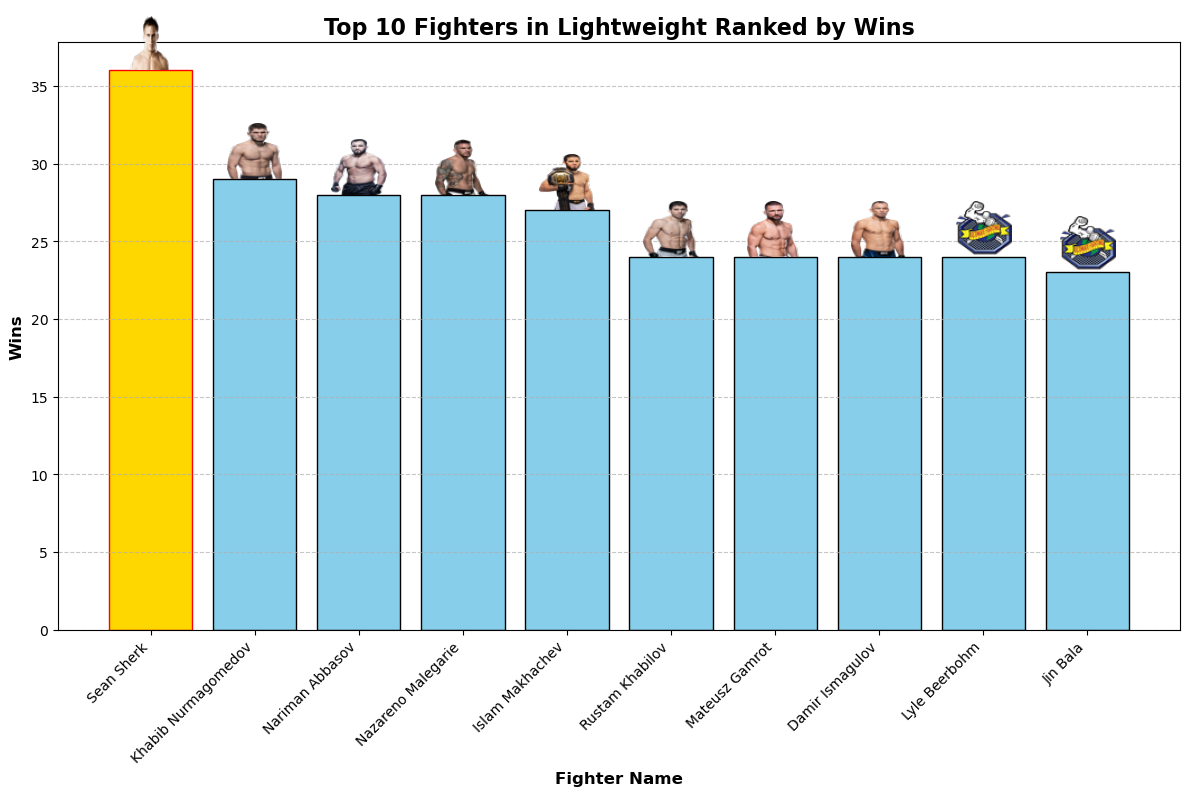

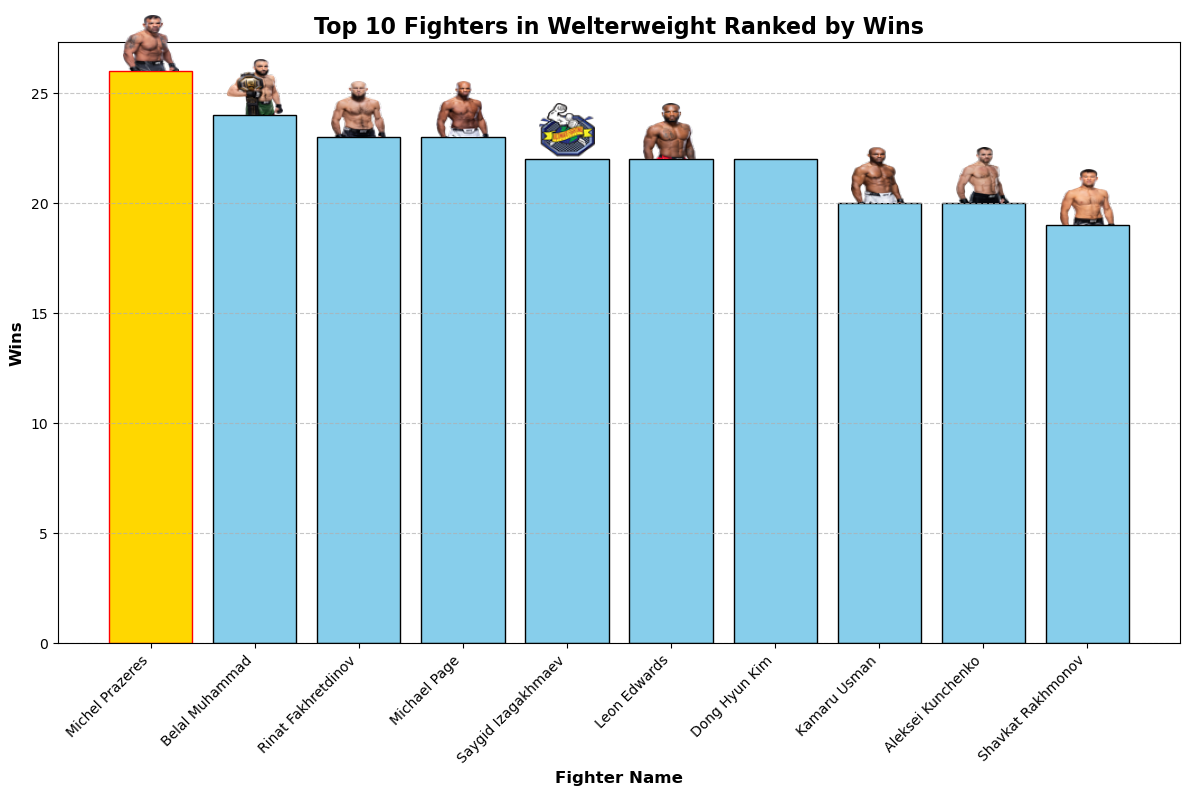

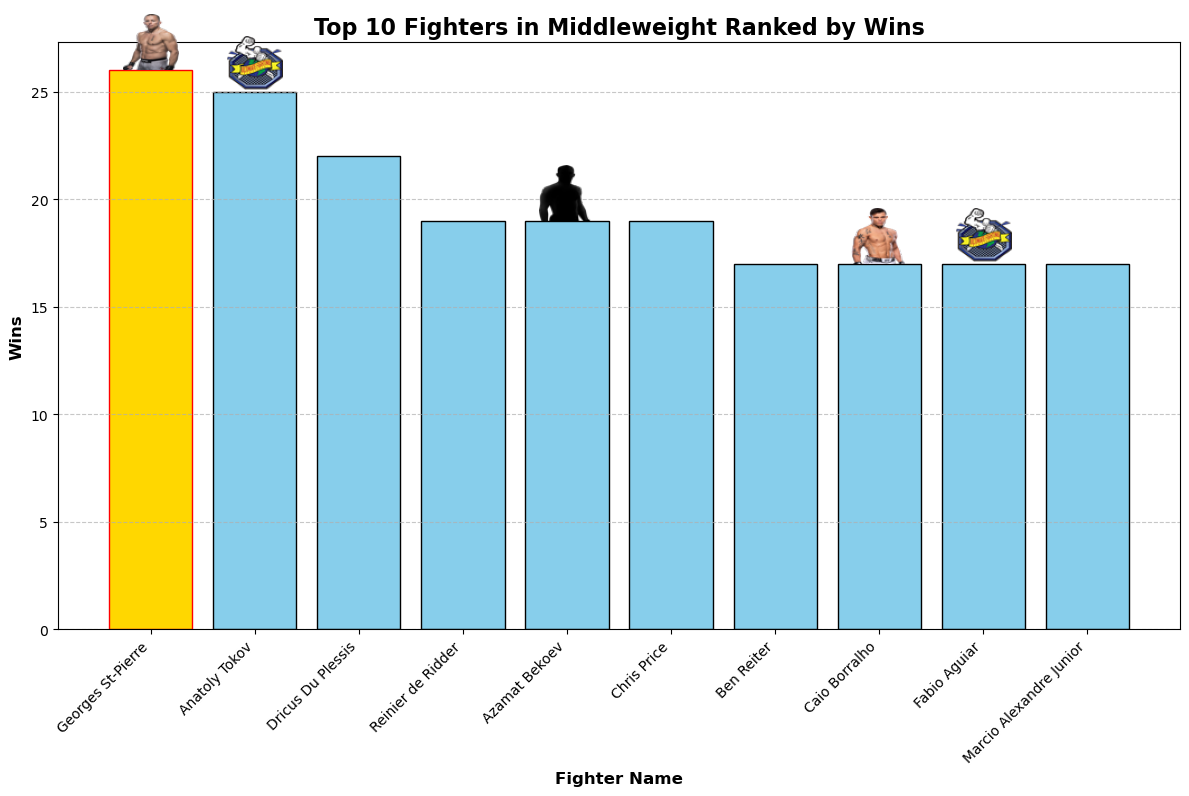

In [26]:
import os
import sys
import requests
import time
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

# Lista över de viktklasser vi vill fokusera på
focus_weight_classes = ['Lightweight', 'Welterweight', 'Middleweight']

# Iterera genom de valda viktklasserna
for weight_class in focus_weight_classes:
    # Filtrera datan för den aktuella viktklassen och endast fighters med färre än 5 förluster
    class_data = combined_data[
        (combined_data['Weight Class'] == weight_class) & (combined_data['L'] < 5)
    ]
    
    # Sortera fighters efter antalet vinster i fallande ordning och ta de topp 10
    top_fighters = class_data.sort_values(by='W', ascending=False).head(10)
    
    if top_fighters.empty:
        continue  # Hoppa över om inga fighters uppfyller kriterierna
        
    # Kombinera för- och efternamn för etikettering
    top_fighters['Name'] = top_fighters['First'].fillna('Unknown') + ' ' + top_fighters['Last'].fillna('Unknown')
    
    # Hämta bilder för de topp fighters
    for fighter in top_fighters['Name']:
        search_name = fighter.replace(" ", "-").lower()
        fighter_url = f"{base_url}/{search_name}"
        
        try:
            with SuppressOutput():
                driver.get(fighter_url)
                time.sleep(2)  # Låt sidan ladda
                img_element = WebDriverWait(driver, 10).until(
                    EC.presence_of_element_located((By.CSS_SELECTOR, "img"))
                )
                img_url = img_element.get_attribute("src")
                img_response = requests.get(img_url)
                img_response.raise_for_status()
                img_name = f"{save_dir}/{fighter.replace(' ', '_')}.png"
                with open(img_name, "wb") as img_file:
                    img_file.write(img_response.content)
        except Exception:
            pass  # Ignorera fel

    # Skapa ett diagram för de topp fighters
    plt.figure(figsize=(12, 8))
    ax = plt.gca()
    
    # Lägg till "osynliga" staplar för att positionera bilderna
    plt.bar(top_fighters['Name'], top_fighters['W'], color='white', edgecolor='white')
    
    # Lägg till fighter-bilder i diagrammet
    for i, fighter in enumerate(top_fighters.itertuples()):
        try:
            img_path = f"{save_dir}/{fighter.First}_{fighter.Last}.png"
            img = Image.open(img_path)
            img = img.resize((50, 50))
            
            imagebox = OffsetImage(img, zoom=0.8)
            ab = AnnotationBbox(imagebox, (i, fighter.W), frameon=False, box_alignment=(0.5, 0))
            ax.add_artist(ab)
        except FileNotFoundError:
            pass  # Ignorera saknade bilder
    
    # Lägg till staplar för att representera vinster
    bars = plt.bar(top_fighters['Name'], top_fighters['W'], color='skyblue', edgecolor='black')

    # Lägg till rutnät för bättre läsbarhet
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Lägg till titel och etiketter
    plt.title(f"Top 10 Fighters in {weight_class} Ranked by Wins", fontsize=16, fontweight='bold')
    plt.xlabel("Fighter Name", fontsize=12, fontweight='bold')
    plt.ylabel("Wins", fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)

    # Markera toppfightern med en unik färg
    if len(bars) > 0:
        bars[0].set_color('gold')
        bars[0].set_edgecolor('red')

    # Justera layout för att undvika överlapp
    plt.tight_layout()

    # Visa diagrammet
    plt.show()

# Stäng WebDriver
driver.quit()


Weight Class
Flyweight             71.829017
Featherweight         70.247071
Bantamweight          69.769076
Welterweight          68.307908
Strawweight           68.076073
Middleweight          66.657418
Heavyweight           65.672650
Lightweight           65.003227
Light heavyweight     63.003428
Cruiserweight         43.050659
Super lightweight     41.552399
Super heavyweight     38.913046
Super middleweight    36.294538
Super welterweight    34.687500
Name: Win Percentage, dtype: float64


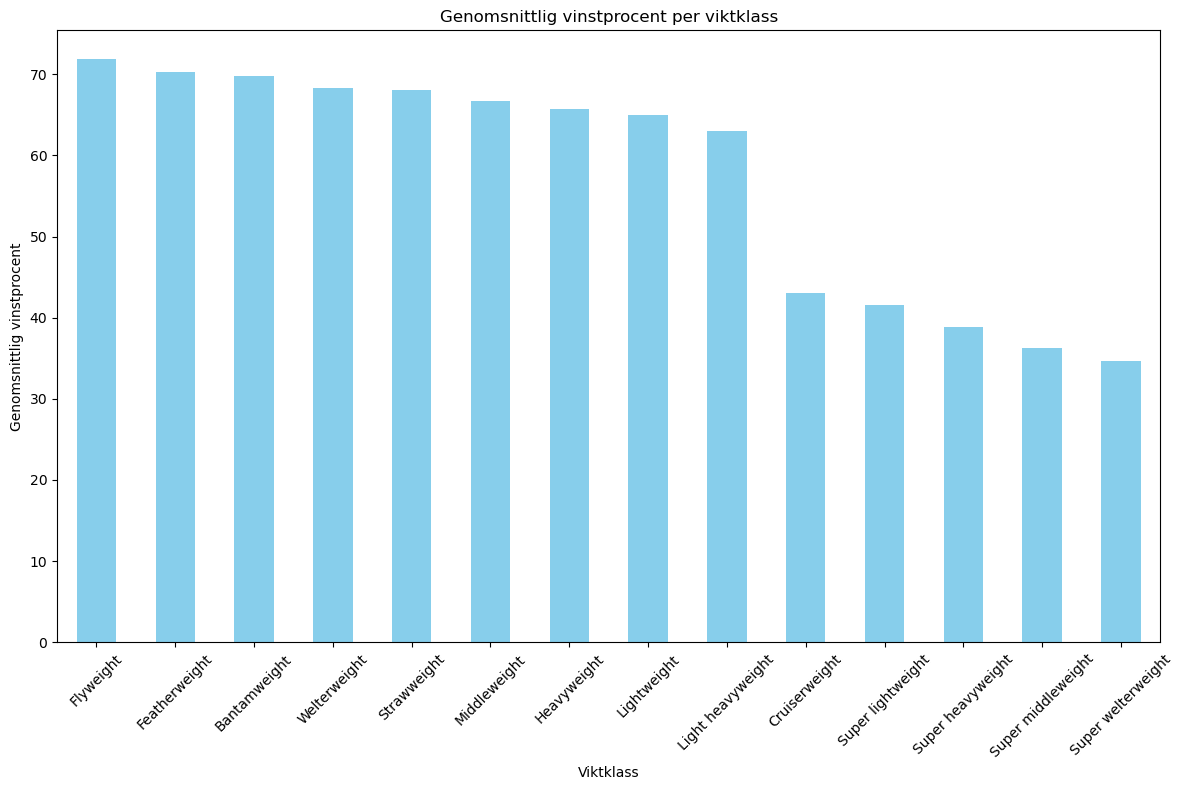

<Figure size 1400x800 with 0 Axes>

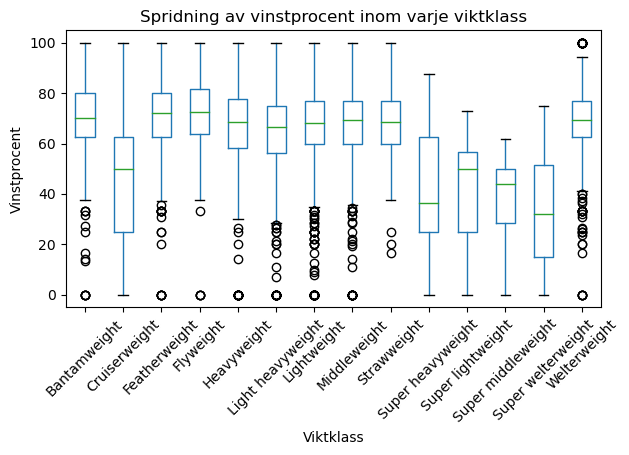

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Säkerställ att kolumnerna för vinster, förluster och oavgjorda är numeriska
combined_data['W'] = pd.to_numeric(combined_data['W'], errors='coerce')
combined_data['L'] = pd.to_numeric(combined_data['L'], errors='coerce')
combined_data['D'] = pd.to_numeric(combined_data['D'], errors='coerce')

# Beräkna totalt antal matcher och vinstprocent
combined_data['Total Fights'] = combined_data['W'] + combined_data['L'] + combined_data['D']
combined_data['Win Percentage'] = (combined_data['W'] / combined_data['Total Fights']) * 100

# Filtrera bort fighters som inte har några matcher
filtered_data = combined_data[combined_data['Total Fights'] > 0]

# Gruppindelning per viktklass och beräkning av genomsnittlig vinstprocent
weight_class_avg_win = filtered_data.groupby('Weight Class')['Win Percentage'].mean().sort_values(ascending=False)

# Visa resultatet i konsolen
print(weight_class_avg_win) 

# Visualisera genomsnittlig vinstprocent per viktklass
plt.figure(figsize=(12, 8))
weight_class_avg_win.plot(kind='bar', color='skyblue')
plt.title('Genomsnittlig vinstprocent per viktklass')
plt.xlabel('Viktklass')
plt.ylabel('Genomsnittlig vinstprocent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Spridning av vinstprocent inom varje viktklass (boxplot)
plt.figure(figsize=(14, 8))
filtered_data.boxplot(column='Win Percentage', by='Weight Class', grid=False)
plt.title('Spridning av vinstprocent inom varje viktklass')
plt.suptitle('')  # Tar bort automatisk överrubrik
plt.xlabel('Viktklass')
plt.ylabel('Vinstprocent')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Avslutning – En Sport i Ständig Rörelse
Genom att analysera och visualisera UFC:s fighters har vi fått en tydligare bild av sportens struktur och dess dominanta stjärnor. Från de snabbaste, tekniska lättviktarna till de kraftfulla giganterna i de tyngsta klasserna visar resultaten att varje viktklass har sin egen unika dynamik och sina egna hjältar. Visualiseringarna låter oss inte bara se siffror och statistik – de ger oss en djupare förståelse för de fighters som skriver sportens historia i oktagonen.

Men sporten är i ständig förändring. Nya namn stiger fram, gamla rivaliteter återuppstår, och varje match kan omdefiniera hierarkin. Det är denna rörelse, denna oförutsägbarhet, som gör UFC och MMA så fängslande. Så nästa gång du ser en match, vet du att bakom varje slag finns statistik, strategier och en berättelse om att bli bäst i världen. Och det är bara början.